In [1]:
# :: 3rd March 2023 :: 3:00pm

In [2]:
import pandas as pd

import nltk
from nltk.corpus import PlaintextCorpusReader
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, display_html, HTML
from nltk.probability import FreqDist
from itertools import chain
from yellowbrick.text.postag import postag
from lexical_diversity import lex_div as ld 
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

In [3]:
lyrics_path = 'lyrics/'
raw_corpus = PlaintextCorpusReader(lyrics_path, '.*\.txt')

lemmanized_pos_lyrics_path = 'lemma_pos_lyrics/'
lemmanized_pos_corpus = PlaintextCorpusReader(lemmanized_pos_lyrics_path, '.*\.txt')

In [4]:
title_list = ['Lyrics Raw', 'Lyrics Lemmanized POS']

In [5]:
#create dataframes of each corpus and pickle for reuse later
def corpus_to_df(input_corpus, title):
    song_name = [re.sub('-|.txt', ' ', d) for d in input_corpus.fileids()]
    lyrics = [input_corpus.raw(d) for d in input_corpus.fileids()]
    tokens = [input_corpus.words(d) for d in input_corpus.fileids()]
    total_tokens = [len(input_corpus.words(d)) for d in input_corpus.fileids()]
    types = [len(set(input_corpus.words(d))) for d in input_corpus.fileids()]
    pos = [nltk.pos_tag(input_corpus.words(d)) for d in input_corpus.fileids()]
    mtld = [ld.mtld(input_corpus.words(d)) for d in input_corpus.fileids()]
    hdd = [ld.hdd(input_corpus.words(d)) for d in input_corpus.fileids()]
    corpus_df = pd.DataFrame({'Song Name': song_name, 'Lyrics': lyrics, 'Tokens': tokens, 'Total Tokens': total_tokens, 'Total Types': types, 'POS': pos, 'HDD Score': hdd, 'MTLD Score': mtld}).set_index('Song Name')
    corpus_df.to_pickle(f'pickled_lyrics/{title}.pkl')
    return 'Process complete!'

In [7]:
corpus_to_df(raw_corpus,'lyrics_raw')
corpus_to_df(lemmanized_pos_corpus, 'lyrics_lemmanized_pos')

'Process complete!'

In [8]:
#create list of variables for pickled dfs 
lyrics_raw_pickle = 'pickled_lyrics/lyrics_raw.pkl'
lyrics_raw_df = pd.read_pickle(lyrics_raw_pickle)

lyrics_lemmanized_pos_pickle = 'pickled_lyrics/lyrics_lemmanized_pos.pkl'
lyrics_lemmanized_pos_df = pd.read_pickle(lyrics_lemmanized_pos_pickle)

lyrics_pickle_list = [lyrics_raw_df, lyrics_lemmanized_pos_df]
lyrics_pickles_titles = ['Lyrics Raw', 'Lyrics Lemmanized POS']

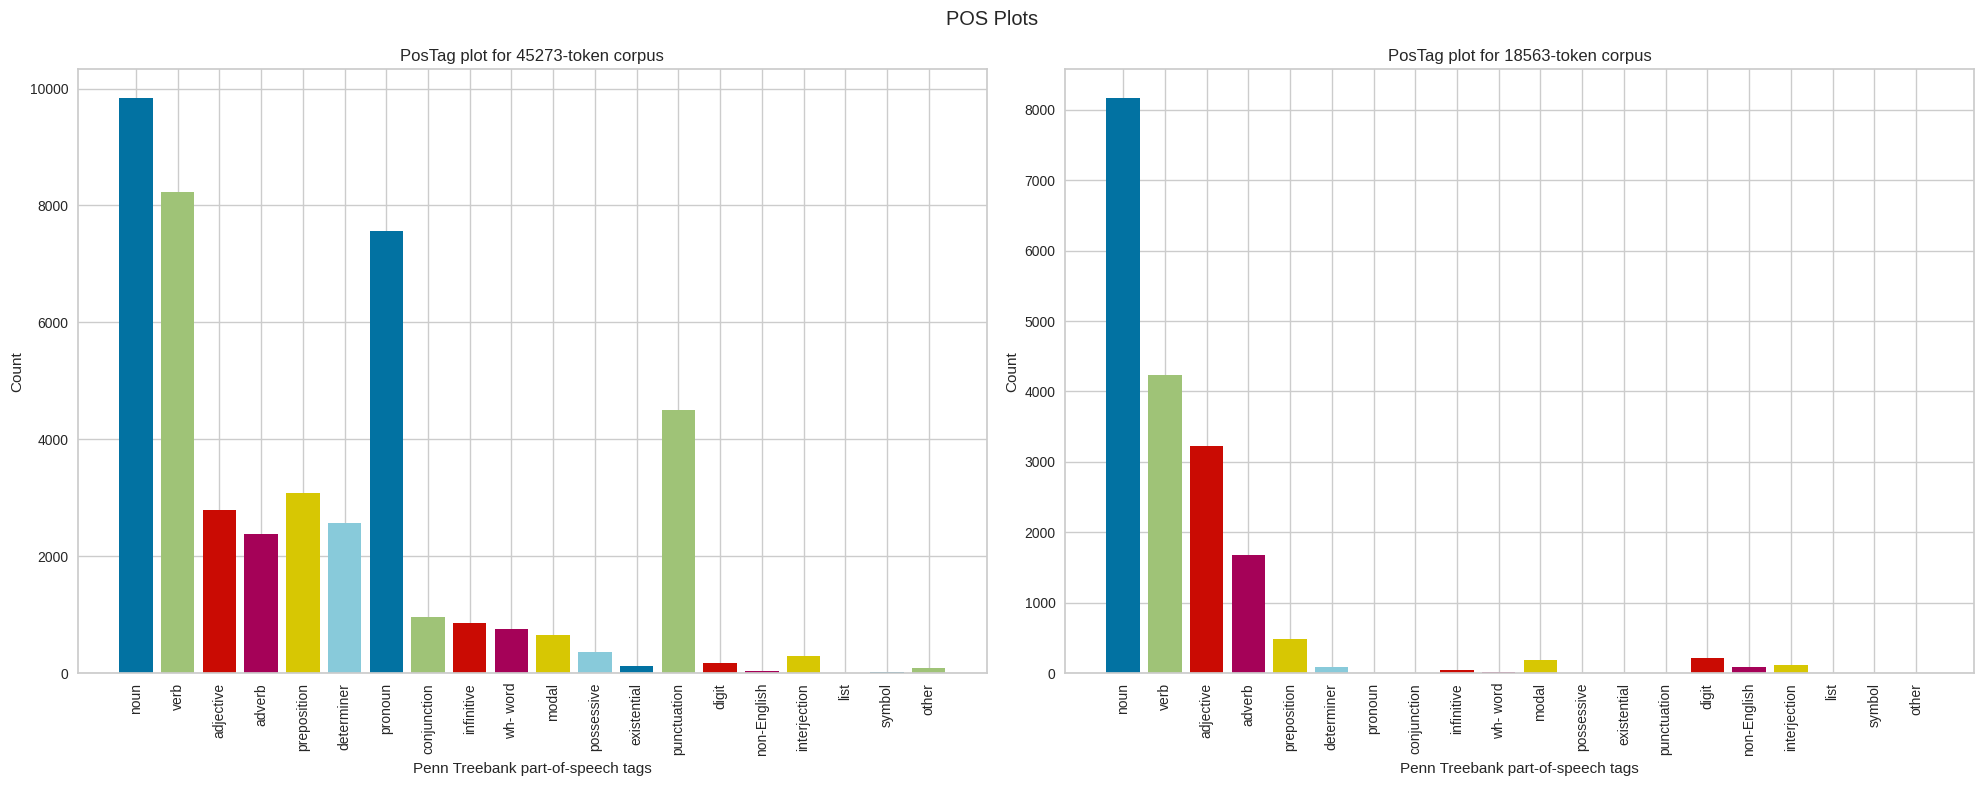

In [9]:
raw_list = [lyrics_raw_df['POS'].tolist()]
lemma_pos_list = [lyrics_lemmanized_pos_df['POS'].tolist()]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  
fig.suptitle('POS Plots')
postag(raw_list, ax=ax1, show=False)
postag(lemma_pos_list, ax=ax2, show=False)
display_html(fig)

In [10]:
#create DFs for all score types and assign variables to them 
#TTR scores 
raw_lyrics_ttr = lyrics_raw_df['Total Types'] / lyrics_raw_df['Total Tokens'] * 100
raw_lyrics_ttr = raw_lyrics_ttr.sort_values(ascending=False)
raw_lyrics_ttr = raw_lyrics_ttr.to_frame('TTR Score')

lemmanized_lyrics_ttr = lyrics_lemmanized_pos_df['Total Types'] / lyrics_lemmanized_pos_df['Total Tokens'] * 100
lemmanized_lyrics_ttr = lemmanized_lyrics_ttr.sort_values(ascending=False)
lemmanized_lyrics_ttr = lemmanized_lyrics_ttr.to_frame('TTR Score')

ttr_scores = [raw_lyrics_ttr, lemmanized_lyrics_ttr]

#HDD scores
raw_lyrics_hdd = lyrics_raw_df['HDD Score'].sort_values(ascending=False)
raw_lyrics_hdd = raw_lyrics_hdd.to_frame()

lemmanized_lyrics_hdd = lyrics_lemmanized_pos_df['HDD Score'].sort_values(ascending=False)
lemmanized_lyrics_hdd = lemmanized_lyrics_hdd.to_frame()

hdd_scores = [raw_lyrics_hdd, lemmanized_lyrics_hdd]

#MTLD scores 
raw_lyrics_mtld = lyrics_raw_df['MTLD Score'].sort_values(ascending=False)
raw_lyrics_mtld = raw_lyrics_mtld.to_frame()

lemmanized_lyrics_mtld = lyrics_lemmanized_pos_df['MTLD Score'].sort_values(ascending=False)
lemmanized_lyrics_mtld = lemmanized_lyrics_mtld.to_frame()

mtld_scores = [raw_lyrics_mtld, lemmanized_lyrics_mtld]

In [11]:
mtld_scores

[                                      MTLD Score
 Song Name                                       
 when im sixty four                     88.284198
 a day in the life live in amsterdam    87.632326
 a day in the life                      87.632326
 lady madonna                           86.819444
 being for the benefit of mr kite       85.510966
 ...                                          ...
 i got to find my baby                   0.000000
 i just dont understand                  0.000000
 sha la la la la                         0.000000
 ill be on my way                        0.000000
 12 bar original                         0.000000
 
 [279 rows x 1 columns],
                                       MTLD Score
 Song Name                                       
 when im sixty four                    126.350000
 a day in the life live in amsterdam   123.296923
 a day in the life                     123.296923
 being for the benefit of mr kite       96.688421
 the sheik of araby    

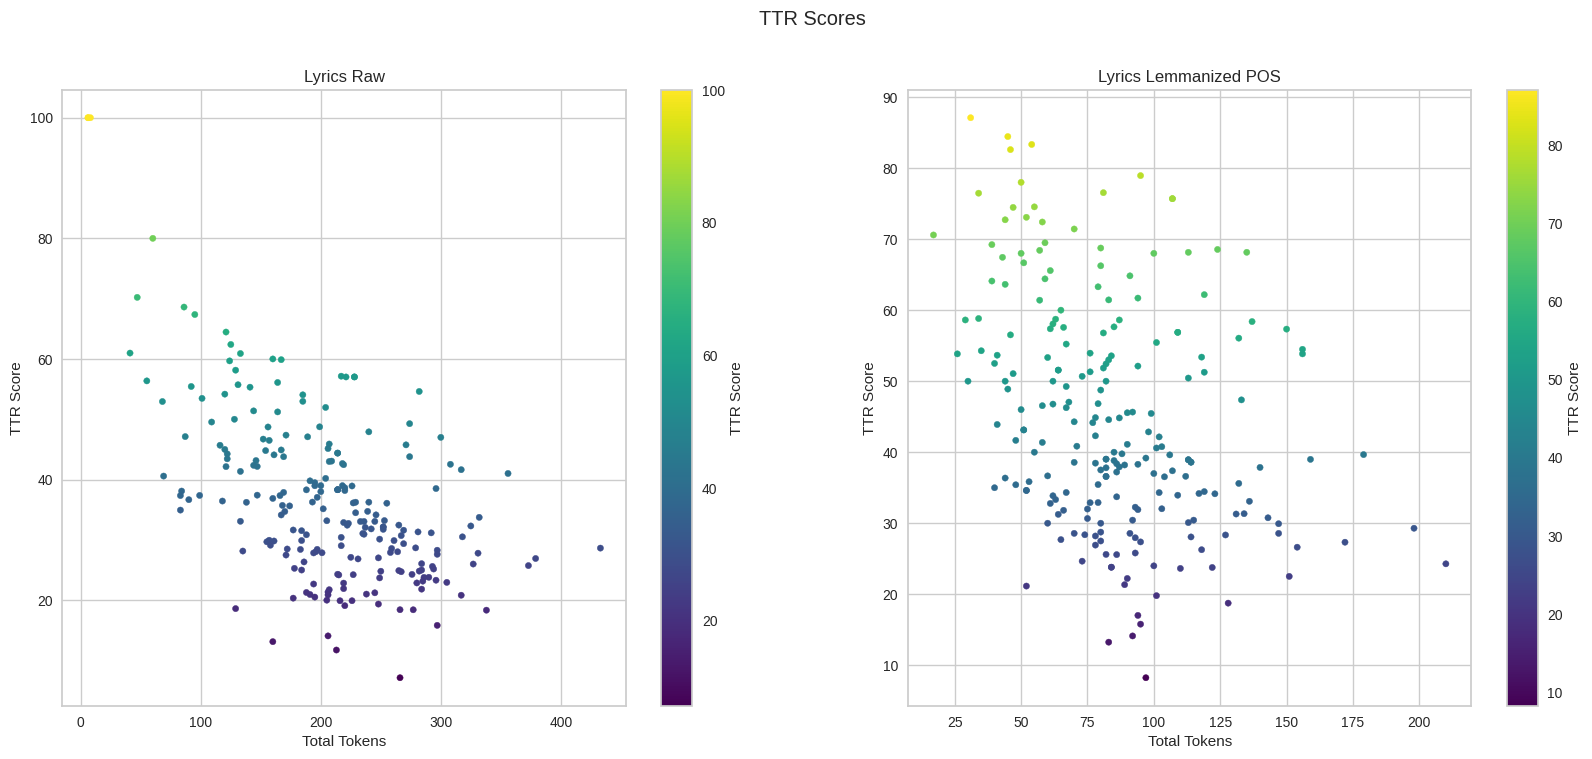

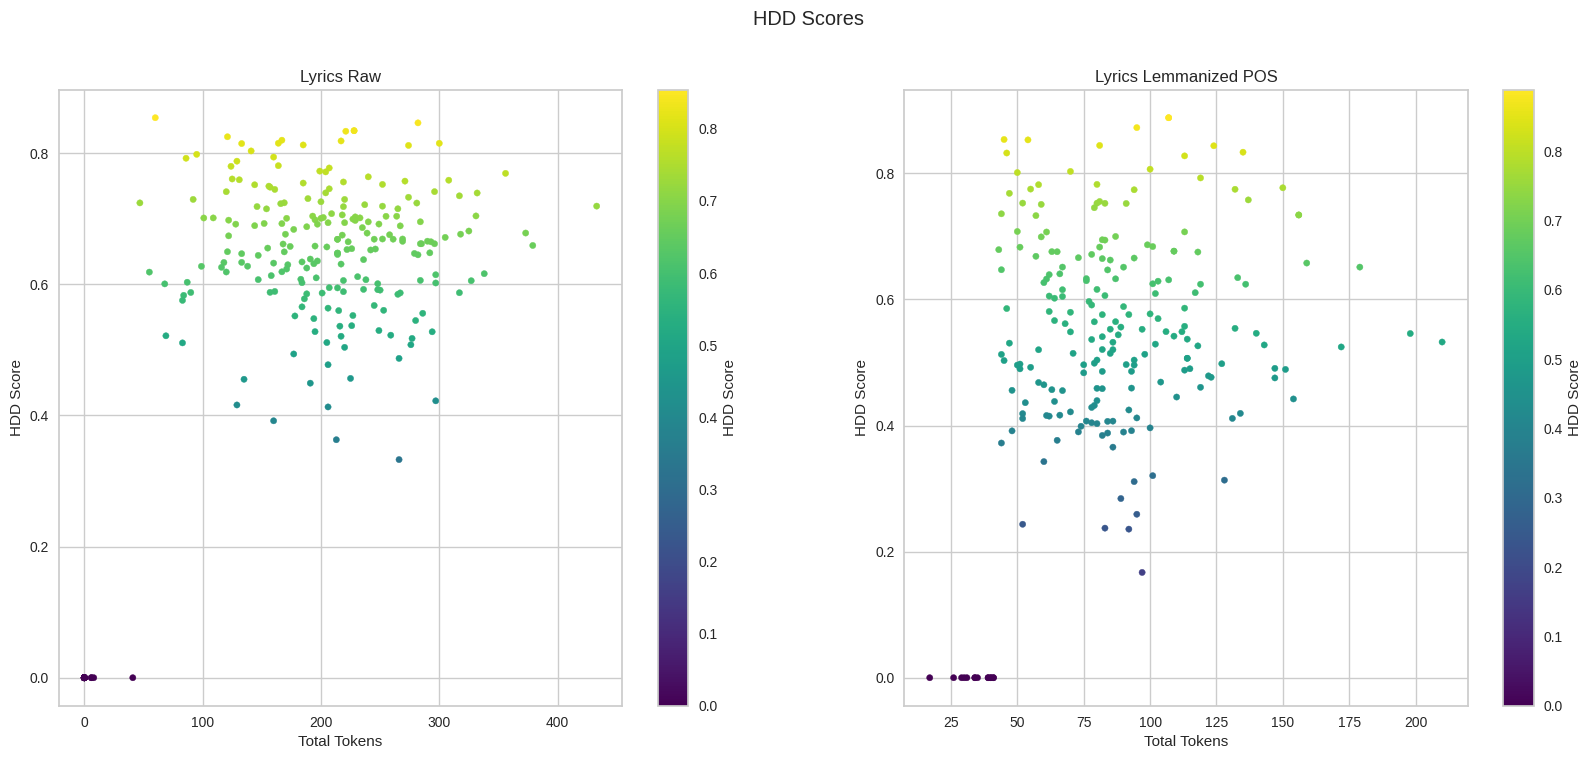

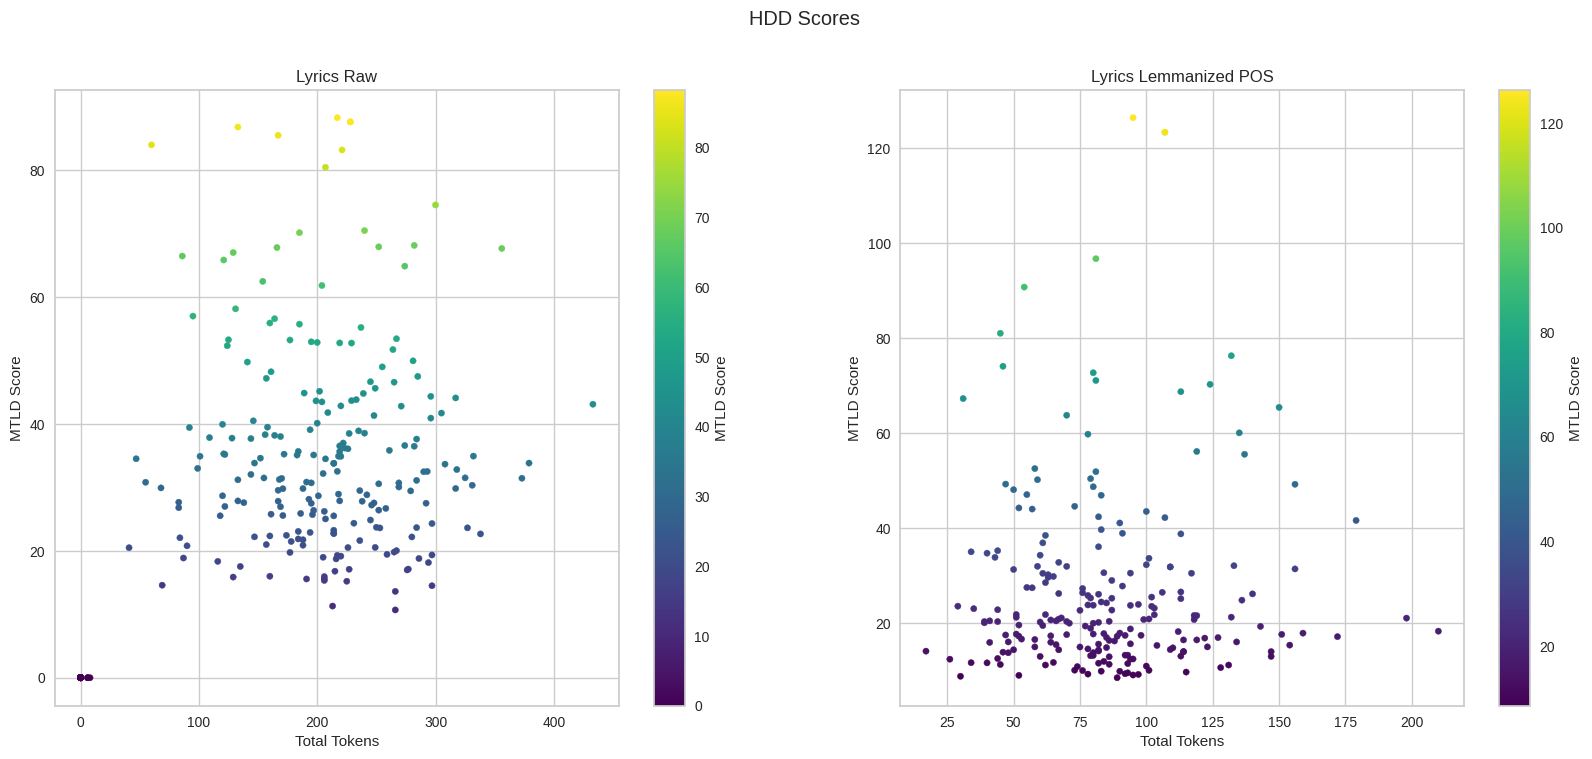

In [12]:
#create a figure and assign scatters for TTR score to it (repeat plot section with HDD and MTLD scores)
raw_lyrics_ttr['Total Tokens'] = lyrics_raw_df['Total Tokens']
lemmanized_lyrics_ttr['Total Tokens'] = lyrics_lemmanized_pos_df['Total Tokens']

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  

fig.suptitle('TTR Scores')

raw_lyrics_ttr.plot.scatter(x='Total Tokens', y='TTR Score', c='TTR Score', colormap='viridis', ax=ax1, title='Lyrics Raw')

lemmanized_lyrics_ttr.plot.scatter(x='Total Tokens', y='TTR Score', c='TTR Score', colormap='viridis', ax=ax2, title='Lyrics Lemmanized POS')

display_html(fig)


#create a figure and assign scatters for TTR score to it (repeat plot section with HDD and MTLD scores)
raw_lyrics_hdd['Total Tokens'] = lyrics_raw_df['Total Tokens']
lemmanized_lyrics_hdd['Total Tokens'] = lyrics_lemmanized_pos_df['Total Tokens']

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  

fig.suptitle('HDD Scores')

raw_lyrics_hdd.plot.scatter(x='Total Tokens', y='HDD Score', c='HDD Score', colormap='viridis', ax=ax1, title='Lyrics Raw')

lemmanized_lyrics_hdd.plot.scatter(x='Total Tokens', y='HDD Score', c='HDD Score', colormap='viridis', ax=ax2, title='Lyrics Lemmanized POS')

display_html(fig)


#create a figure and assign scatters for TTR score to it (repeat plot section with HDD and MTLD scores)
raw_lyrics_mtld['Total Tokens'] = lyrics_raw_df['Total Tokens']
lemmanized_lyrics_mtld['Total Tokens'] = lyrics_lemmanized_pos_df['Total Tokens']

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  

fig.suptitle('HDD Scores')

raw_lyrics_mtld.plot.scatter(x='Total Tokens', y='MTLD Score', c='MTLD Score', colormap='viridis', ax=ax1, title='Lyrics Raw')

lemmanized_lyrics_mtld.plot.scatter(x='Total Tokens', y='MTLD Score', c='MTLD Score', colormap='viridis', ax=ax2, title='Lyrics Lemmanized POS')

display_html(fig)

In [13]:
combined_list_ttr = [raw_lyrics_ttr, lemmanized_lyrics_ttr]
combined_list_hdd = [raw_lyrics_hdd, lemmanized_lyrics_hdd]
combined_list_mtld = [raw_lyrics_mtld, lemmanized_lyrics_mtld]

#Display top 10 side by side, one row for each calculation, one column for each corpus - raw, R, Python (swap head for tail to display bottom 10)
output = ""
for df in combined_list_ttr:
    output += df.head(10).style.set_table_attributes("style='display:inline'")._repr_html_()
    output += "\xa0\xa0\xa0"
display(HTML(output))

output = ""
for df in combined_list_hdd:
    output += df.head(10).style.set_table_attributes("style='display:inline'")._repr_html_()
    output += "\xa0\xa0\xa0"
display(HTML(output))

output = ""
for df in combined_list_mtld:
    output += df.head(10).style.set_table_attributes("style='display:inline'")._repr_html_()
    output += "\xa0\xa0\xa0"
display(HTML(output))

,TTR Score,Total Tokens
Song Name,,
cayenne,100.000000,6
a beginning,100.000000,6
cry for a shadow,100.000000,8
maggie mae,80.000000,60
sun king,70.212766,47
mother natures son,68.604651,86
mean mr mustard,67.368421,95
piggies,64.462810,121
i will,62.400000,125


,HDD Score,Total Tokens
Song Name,,
maggie mae,0.853828,60
rocky raccoon,0.845998,282
a day in the life live in amsterdam,0.834044,228
a day in the life,0.834044,228
bad boy,0.833225,221
piggies,0.824792,121
being for the benefit of mr kite,0.819557,167
when im sixty four,0.818410,217
you never give me your money,0.814911,164


,MTLD Score,Total Tokens
Song Name,,
when im sixty four,88.284198,217
a day in the life live in amsterdam,87.632326,228
a day in the life,87.632326,228
lady madonna,86.819444,133
being for the benefit of mr kite,85.510966,167
maggie mae,84.000000,60
bad boy,83.198755,221
for no one,80.471711,207
maxwells silver hammer,74.532346,300


In [14]:
lyrics_corpus_list = [raw_corpus, lemmanized_pos_corpus]

In [15]:
#return top 15 most common words in corpus and their frequency 

def most_common_words(input_corpus):
    mcw_corpus = []
    for d in input_corpus.fileids():
        fdist = FreqDist(input_corpus.words(d))
        mcw_corpus.append(fdist.most_common())
    final_list = [x for x in chain.from_iterable(mcw_corpus)]
    commondf = pd.DataFrame.from_records(final_list, columns=['Word', 'Frequency'])
    grouped = commondf.groupby('Word', sort=True).sum()
    grouped = grouped.sort_values(by=['Frequency'], ascending=False)
    return grouped[0:15]

#process all corpora to return top 15 most common words and frequencies 

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

display_side_by_side([most_common_words(c) for c in lyrics_corpus_list], [t for t in title_list])

,Frequency
Word,
',2399
I,1976
",",1893
you,1750
the,1018
me,857
to,809
s,710
a,698


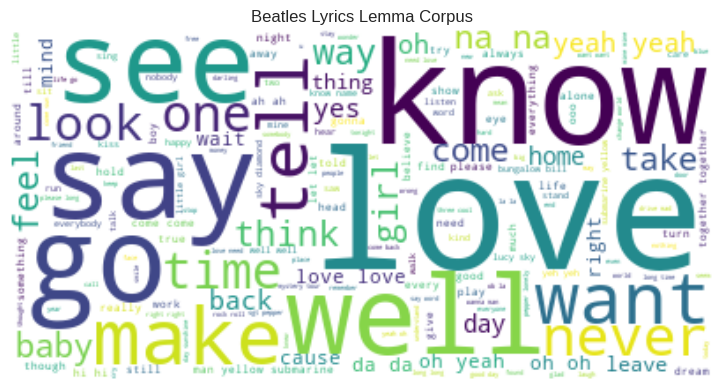

In [16]:
#display wordcloud of corpus 
rbma_corpus_list = [lemmanized_pos_corpus]
title_list = ['Beatles Lyrics Lemma Corpus']

def corpus_to_wordcloud(corpus_list):
        plt.figure(figsize=(20,8))
        for i, c in enumerate(corpus_list):
                text = " ".join(t for t in c.words())
                wordcloud = WordCloud(background_color="white").generate(text)
                plt.subplot(1, 2, i+1)
                plt.plot()
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis("off")
                plt.title(title_list[i])
        plt.show()

display_html(corpus_to_wordcloud(rbma_corpus_list))

In [17]:
import little_mallet_wrapper

In [18]:
path_to_mallet = './Mallet-202108/bin/mallet'

In [19]:
from pathlib import Path

In [20]:
little_mallet_wrapper.print_dataset_stats(lyrics_lemmanized_pos_df)

Number of Documents: 218
Mean Number of Words per Document: 1.6
Vocabulary Size: 8
